Pos/Time Graph - Data Visualized - __Trial 2__

Importing the __pandas__ library to read our csv data from google sheets

In [122]:
import pandas as pd

Importing numpy and scipy modules to work with our data and fit their respective models with linear or non linear fitting

In [123]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

Importing our graphing libraries

In [124]:
import matplotlib.pyplot as plt
import scienceplots as sp

Setting the plot to use scientific and grid style graphs

In [125]:
plt.style.use(['science', 'grid', 'notebook', 'no-latex'])

Reading the csv data

In [126]:
trial_two_data = pd.read_csv('trial_two.csv')

Output for trial two data

In [127]:
trial_two_data

,Time,Pos/Disp.
0,0.00,0
1,3.53,3
2,6.58,6
3,9.90,9
4,11.60,12
5,13.28,15
6,15.30,18
7,16.91,21
8,17.95,24
9,18.80,27


Adding our x and y labels to our plots

In [128]:
trial_two_plot = trial_two_data[['Time', 'Pos/Disp.']]

Here we create the graph - as per instruction we have not 'connected' the points, but we just draw a simple interpolation between them to see the graph's structure and where it's taking us. This is how we determine if we need a curve/line of best fit and determine the best 'function' that represents the relationship.

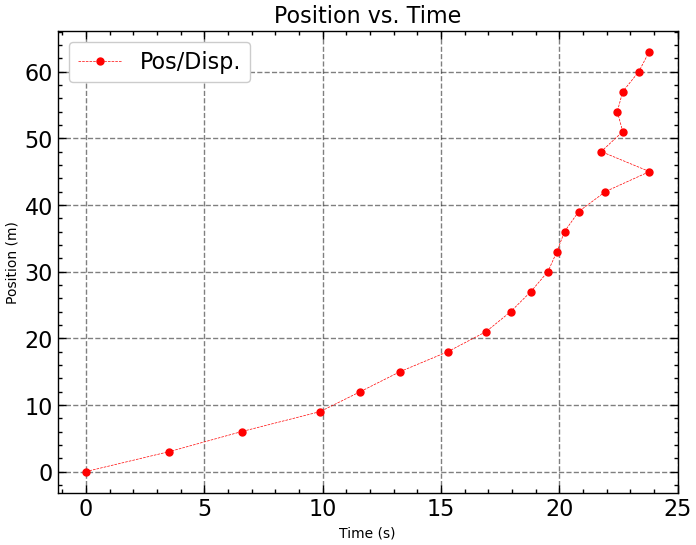

In [129]:
trial_two_plot.plot(x='Time', y='Pos/Disp.', title='Position vs. Time', xlabel='Time (s)', ylabel='Position (m)', linestyle=
                    '--', marker='o', color='red', lw='0.5', ms='5')
plt.show()

The relationship is best defined as non-linear - therefore we now create a 'curve' of best fit.

The data is not that noisy except for one visual outlier. It looks as if though we could fit an exponential function or a quadratic function to fit the data best. From desmos, we get a 95% regression rating that satisfies that this data is best fitted with an exponential curve and a 94% regression rating that satisfies the data with a quadratic curve. 

But an important thing to understand is this:

An exponential function is NOT a polynomial function, because polynomial functions have a fixed growth or decay rate. The most important thing to understand is that if we try to differentiate an exponential function we end up with an exponential function because the growth or decay rate is variable based on the independent variable "x". It's also the same for a logarithimic function as well. Other types of functions that are non-polynomial include trigonometric functions, radical functions, hyperbolic functions, rational functions, and picewise defined functions.The degree of the polynomial should be a positive real number. 

And as an extra note: the nth derivative (any order of differentiation) of an exponential function will always be exponential.

So while we should not be using an exponential function...for visual purposes, I will implement it. But instead of directly differentiating using python functions, I will just take the slope of the tangent line because regardless of quadratic or exponential, the concept of taking tangent lines to points is still the same, even though differentiating both functions give completely different results. 


Extracting the __x/y__ values (time/pos)

In [130]:
time_values = trial_two_data['Time'].values
position_values = trial_two_data['Pos/Disp.'].values

Defining the function we want to fit - the "RELATIONSHIP" between the time and position values is unknown to us, but it looks polynomial so we need a specific function that describes it!

In [131]:
# defining our quadratic function (polynomial degree 2) with all the transformations in the form f(x) = af[k(x - d)] + c
def exp_func(x, a, k, d, c):
    return a*((k*(x - d))**2) + c

# def exp_func(x, a, b, k, d, c):
#     return a*(b**(k*(x - d))) + c

In [132]:
#TODO check first second differences
# 
# performing regression
popt, pcov = curve_fit(exp_func, time_values, position_values)


a = popt[0]
k = popt[1] # a coefficient
d = popt[2]
c = popt[3]
# c = popt[4] # for non-polynomial exponentials

print(f"{a}\n{k}\n{d}\n{c}") 

2.001870147826996
-0.2709123637507628
4.5019570424786925
1.444616815249991


Plotting the final 'fitted' curve with comparison to points shown

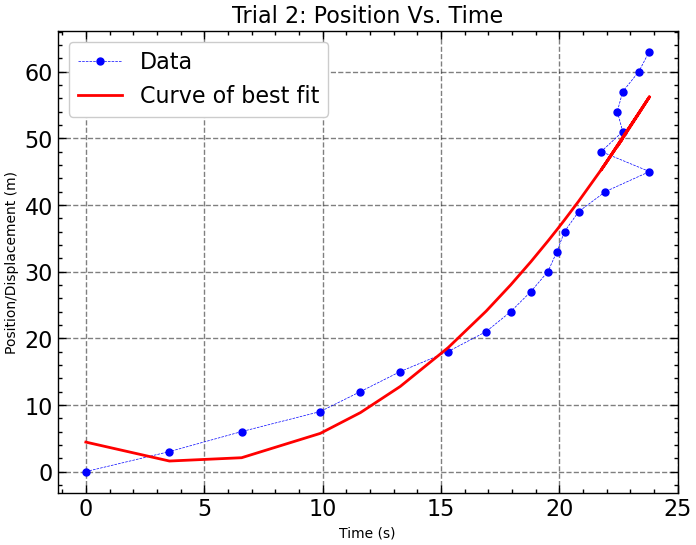

In [133]:
plt.plot(time_values, position_values, linestyle='--', marker='o', color='blue', linewidth='0.5', markersize='5', label='Data')
plt.plot(time_values, exp_func(time_values, a, k, d, c), color='red', linestyle='-', label='Curve of best fit')
plt.xlabel('Time (s)')
plt.ylabel('Position/Displacement (m)')
plt.title('Trial 2: Position Vs. Time')
plt.legend()
plt.show()

In [134]:
# # Printing out the equation for the curve of best fit
equation = f'f(x) = {b:.2f}^x'
print(equation)

f(x) = 1.09^x


Now we need to create the respective velocity time graph. Recalling that if the position/time graph is linear, then that means velocity is uniform and constant moving in the direction either positive or negative determined by the position/time graph. This also means that there is no acceleration because the velocity is constant. In this case, the velocity is increasing positively and has accelerated motion.

To graph the __slopes__ - we need to use the average slope formula which is defined as dy/dx = y2 - y1 / x2 - x1, by taking tangents at points which represent instantaneous velocities. Remembering that velocity is a change in position over change in time. So therefore in calculus terms, velocity is the first derivative of the position with respect to time. Therefore velocity is rate of change in position (displacement) over time.

In [135]:
# # Calculate the derivative
# derivative_values = np.full((time_values.size,), m)

# # Plot the derivative
# plt.plot(time_values, derivative_values, color='green', linestyle='-')

# # Add labels and legend to the plot
# plt.xlabel('Time (s)')
# plt.ylabel('Velocity (m/s)')
# plt.title('Trial 1: Velocity Vs. Time')

# # Show the plot
# plt.show()

# print(m)

Now for the acceleration time graph, which is the second derivative of the position time graph - again it's 0, because velocity is constant

In [136]:
# # dy/dx on velocity graph - second derivative using diff()
# acceleration_values = np.diff(derivative_values) / np.diff(time_values)

# # Plot the second derivative
# plt.plot(time_values[1:], acceleration_values, color='green', linestyle='-')

# # Add labels to the plot
# plt.xlabel('Time (s)')
# plt.ylabel('Acceleration (m/s^2)')
# plt.title('Trial 1: Acceleration Vs. Time')

# # Show the plot
# plt.show()
